<a href="https://colab.research.google.com/github/sunnypaajee/FIFA_Rating_Model/blob/main/FIFA_UT_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Common imports
import numpy as np
import pandas as pd
import os
import seaborn as sns
from scipy import stats
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import style

import plotly.express as px
# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [ ]:
import urllib.request
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/jpzambranoleon/ML_Projects/master/"
TRAIN_PATH = os.path.join("datasets", "players_20")
TRAIN_URL = DOWNLOAD_ROOT + "datasets/players_20.csv"
def fetch_train_data(train_url=TRAIN_URL, train_path=TRAIN_PATH):
  os.makedirs(train_path, exist_ok=True)
  csv_path = os.path.join(train_path, "players_20.csv")
  urllib.request.urlretrieve(train_url, csv_path)

In [ ]:
fetch_train_data()


In [ ]:
import pandas as pd
def load_train_data(train_path=TRAIN_PATH):
  csv_path = os.path.join(train_path, "players_20.csv")
  return pd.read_csv(csv_path)

In [ ]:
player_data = load_train_data()
player_data.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [ ]:
player_data.shape


(18278, 104)

In [ ]:
columns = ['overall','attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure', 'defending_marking', 'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes']

In [ ]:
player_df = player_data[columns]
player_df.head()

,overall,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,94,88,95,70,92,88,97,93,94,92,...,75,96,33,37,26,6,11,15,14,8
1,93,84,94,89,83,87,89,81,76,77,...,85,95,28,32,24,7,11,15,14,11
2,92,87,87,62,87,87,96,88,87,81,...,90,94,27,26,29,9,9,15,15,11
3,91,13,11,15,43,13,12,13,14,40,...,11,68,27,12,18,87,92,78,90,89
4,91,81,84,61,89,83,95,83,79,83,...,88,91,34,27,22,11,12,6,8,8


In [ ]:
player_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   overall                     18278 non-null  int64
 1   attacking_crossing          18278 non-null  int64
 2   attacking_finishing         18278 non-null  int64
 3   attacking_heading_accuracy  18278 non-null  int64
 4   attacking_short_passing     18278 non-null  int64
 5   attacking_volleys           18278 non-null  int64
 6   skill_dribbling             18278 non-null  int64
 7   skill_curve                 18278 non-null  int64
 8   skill_fk_accuracy           18278 non-null  int64
 9   skill_long_passing          18278 non-null  int64
 10  skill_ball_control          18278 non-null  int64
 11  movement_acceleration       18278 non-null  int64
 12  movement_sprint_speed       18278 non-null  int64
 13  movement_agility            18278 non-null  int64
 14  moveme

In [ ]:
player_df.describe()

,overall,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,...,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,66.244994,49.718405,45.590218,52.221468,58.748003,42.809388,55.596509,47.325692,42.708885,52.768848,...,48.383357,58.528778,46.848889,47.640333,45.606631,16.572765,16.354853,16.212934,16.368038,16.709924
std,6.949953,18.325403,19.594609,17.428429,14.679653,17.701815,18.929118,18.422991,17.433612,15.246454,...,15.708099,11.880840,20.091287,21.585641,21.217734,17.738069,16.996925,16.613665,17.136497,18.038125
min,48.000000,5.000000,2.000000,5.000000,7.000000,3.000000,4.000000,6.000000,4.000000,8.000000,...,7.000000,12.000000,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,62.000000,38.000000,30.000000,44.000000,54.000000,30.000000,50.000000,34.000000,31.000000,43.000000,...,39.000000,51.000000,29.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,66.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,49.000000,41.000000,56.000000,...,49.000000,60.000000,52.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,71.000000,64.000000,62.000000,64.000000,68.000000,56.000000,68.000000,62.000000,56.000000,64.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,94.000000,93.000000,95.000000,93.000000,92.000000,90.000000,97.000000,94.000000,94.000000,92.000000,...,92.000000,96.000000,94.000000,92.000000,90.000000,90.000000,92.000000,93.000000,91.000000,92.000000


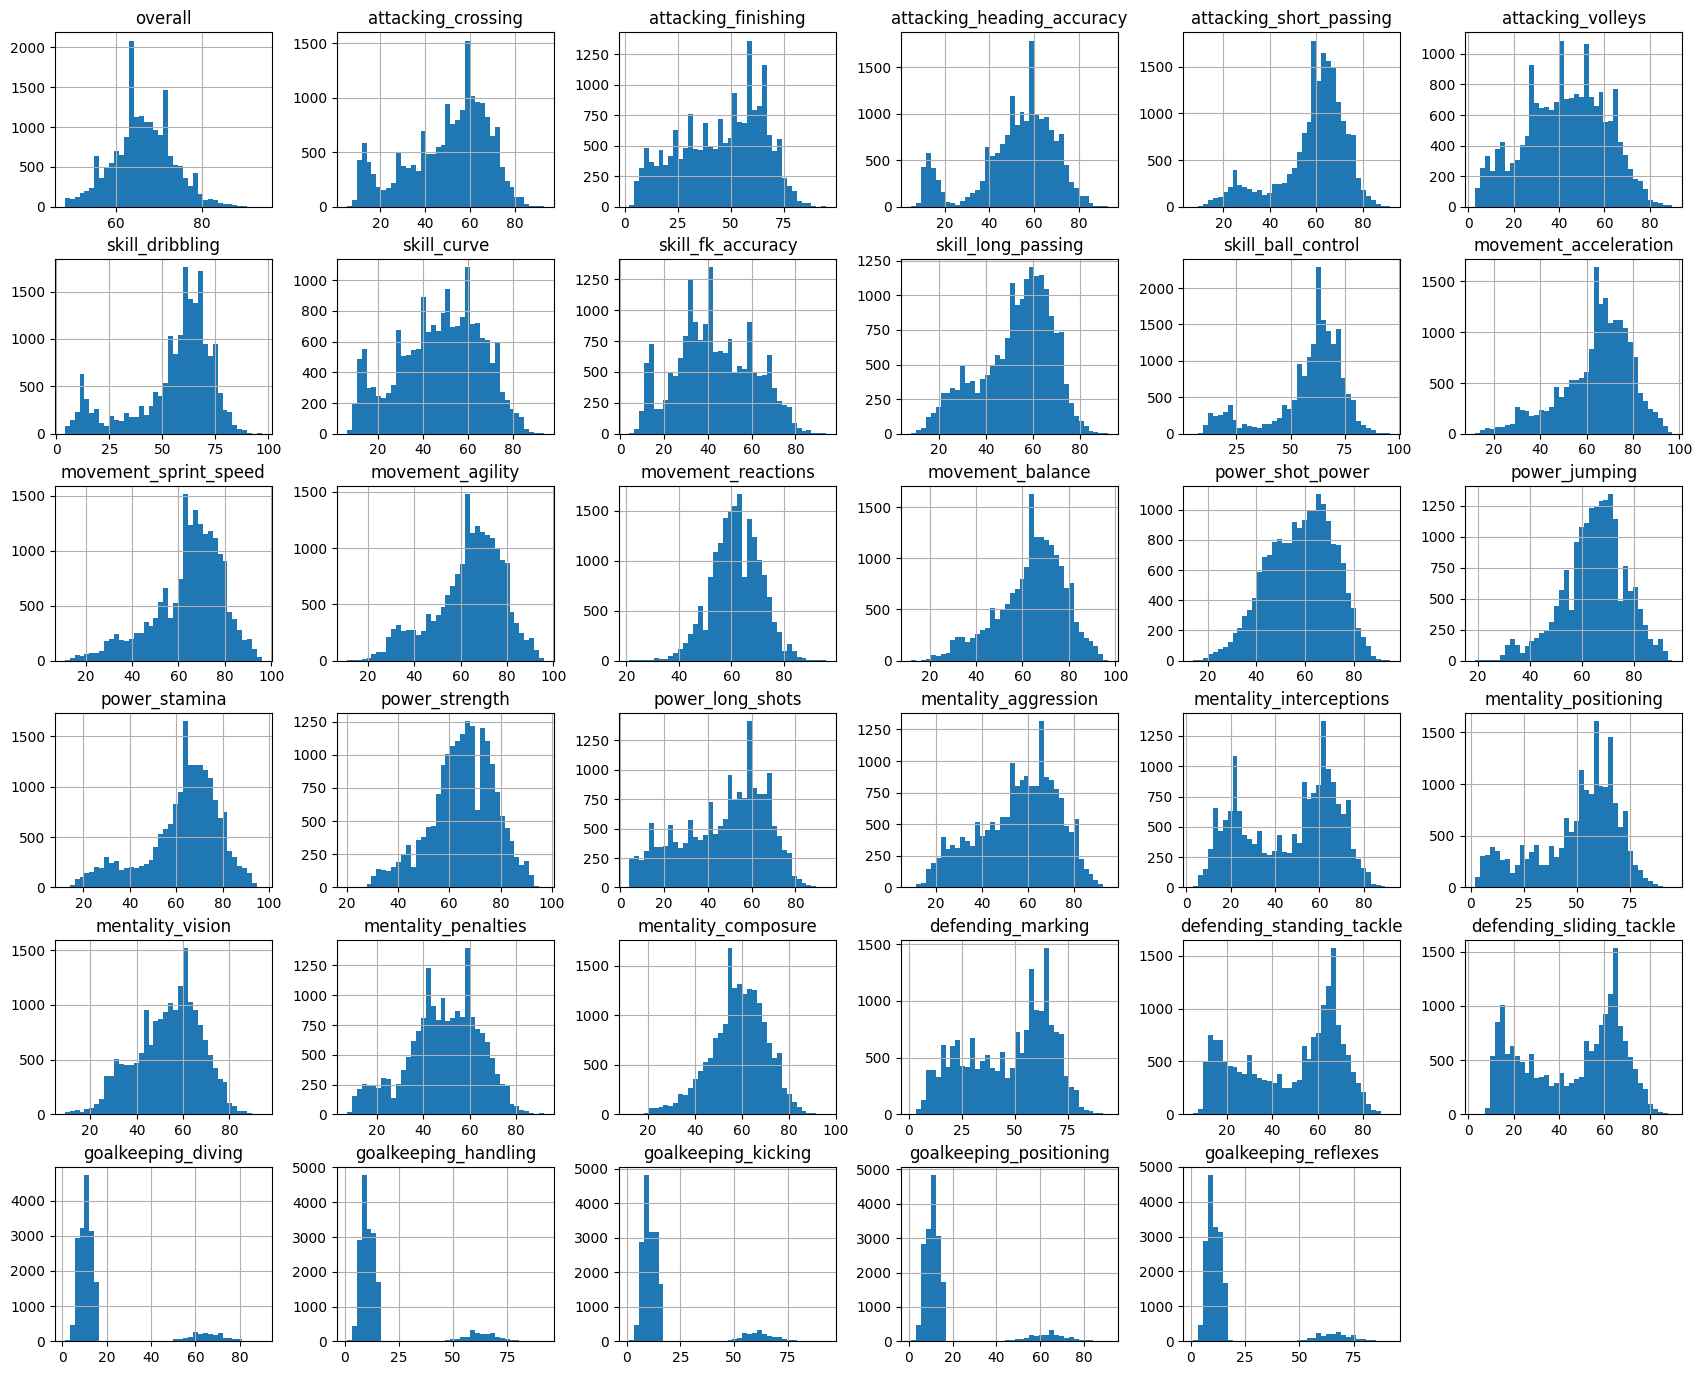

In [ ]:
player_df.hist(bins=40 , figsize=(21,17))
plt.show()

In [ ]:
player_df.isna().any()


overall                       False
attacking_crossing            False
attacking_finishing           False
attacking_heading_accuracy    False
attacking_short_passing       False
attacking_volleys             False
skill_dribbling               False
skill_curve                   False
skill_fk_accuracy             False
skill_long_passing            False
skill_ball_control            False
movement_acceleration         False
movement_sprint_speed         False
movement_agility              False
movement_reactions            False
movement_balance              False
power_shot_power              False
power_jumping                 False
power_stamina                 False
power_strength                False
power_long_shots              False
mentality_aggression          False
mentality_interceptions       False
mentality_positioning         False
mentality_vision              False
mentality_penalties           False
mentality_composure           False
defending_marking           

In [ ]:
from sklearn.model_selection import train_test_split
train_set , test_set = train_test_split(player_df , test_size= 0.2 , random_state=42)
print("Length of the training set ",len(train_set))
print("Length of testing data:", len(test_set))
print("Length of total data:", len(player_df))

Length of the training set  14622
Length of testing data: 3656
Length of total data: 18278


In [ ]:
fifa_df = train_set.copy()
corr_matrix = fifa_df.corr()
corr_matrix['overall'].sort_values(ascending=False)

overall                       1.000000
movement_reactions            0.865583
mentality_composure           0.719927
power_shot_power              0.570048
mentality_vision              0.509595
attacking_short_passing       0.506783
skill_long_passing            0.492170
skill_ball_control            0.461000
power_long_shots              0.428551
skill_curve                   0.418644
mentality_aggression          0.404848
attacking_volleys             0.398905
attacking_crossing            0.392936
skill_fk_accuracy             0.391248
skill_dribbling               0.375421
power_stamina                 0.373520
power_strength                0.364329
mentality_positioning         0.359833
attacking_heading_accuracy    0.352435
mentality_penalties           0.352399
attacking_finishing           0.346992
mentality_interceptions       0.316495
defending_marking             0.303238
power_jumping                 0.272588
movement_agility              0.257805
defending_standing_tackle

<Axes: xlabel='movement_reactions', ylabel='overall'>

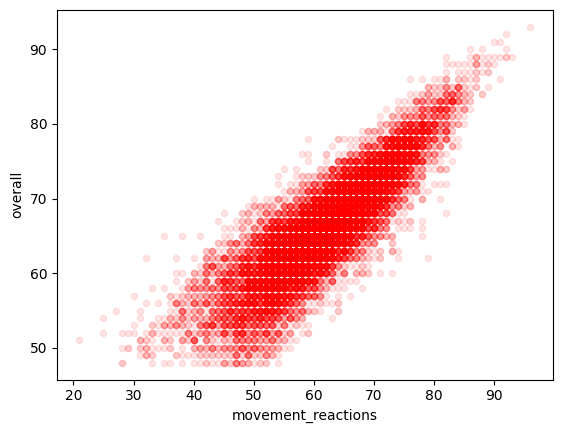

In [ ]:
fifa_df.plot(kind = 'scatter' , x = 'movement_reactions' , y= 'overall' , alpha = 0.1 , color ='red')

In [ ]:
y_train = train_set['overall']
X_train = train_set.drop('overall', axis=1)
y_test = test_set['overall']
X_test = test_set.drop('overall', axis=1)

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error


In [ ]:
y_pred = lin_reg.predict(X_train)


In [ ]:
from sklearn.metrics import mean_squared_error
y_predictions = lin_reg.predict(X_train)
lin_mse = mean_squared_error(y_train, y_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

2.4935748841832255

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)
y_predictions = tree_reg.predict(X_train)
tree_mse = mean_squared_error(y_train, y_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)
y_predictions = forest_reg.predict(X_train)
forest_mse = mean_squared_error(y_train, y_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.4724586538443285

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lin_reg, X_train, y_train,scoring='neg_mean_squared_error', cv=10)
lin_reg_scores = np.sqrt(-scores)
def display_scores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard Deviation:", scores.std())
display_scores(lin_reg_scores)

Scores: [2.48985397 2.509888   2.50910312 2.4642167  2.46189444 2.51445854
 2.48370267 2.4734443  2.48382446 2.59475861]
Mean: 2.498514482645006
Standard Deviation: 0.036626071594274535


In [ ]:
scores = cross_val_score(tree_reg, X_train, y_train,scoring='neg_mean_squared_error', cv=10)
tree_scores = np.sqrt(-scores)
display_scores(tree_scores)

Scores: [2.04494943 2.08172072 2.11744755 2.13738145 2.13193425 2.15093909
 2.11211087 2.02970418 2.27608755 2.11437656]
Mean: 2.119665165496211
Standard Deviation: 0.06412142776093076


In [ ]:
scores = cross_val_score(forest_reg, X_train, y_train,scoring='neg_mean_squared_error', cv=10)
tree_scores = np.sqrt(-scores)
display_scores(tree_scores)

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = [
{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
{'bootstrap': [False], 'n_estimators': [3,10], 'max_features': [2,3,4]},
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
grid_search.best_params_


{'max_features': 6, 'n_estimators': 30}

In [ ]:
final_model = grid_search.best_estimator_
final_predictions = final_model.predict(X_test)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

1.1498960037121921

In [ ]:
some_random_data = X_test.iloc[0:5]
some_random_label = y_test.iloc[0:5]
final_pred= final_model.predict(some_random_data)
print(final_pred)
print(list(some_random_label))

[64.46666667 73.7        68.86666667 68.36666667 63.36666667]
[64, 74, 69, 68, 63]
